In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


In [166]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [167]:
df_auto=pd.read_csv("Auto_MPG.csv", sep=",")
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [168]:
df_auto.drop(['name'],axis=1,inplace=True)

In [169]:
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


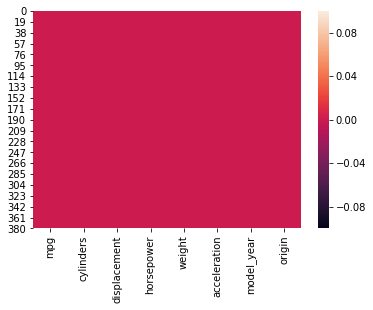

In [170]:
import seaborn as sns
sns.heatmap(df_auto.isnull())
#no null values

In [171]:
x=df_auto.iloc[:,1:8]
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [172]:
y=df_auto.iloc[:,0]
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [173]:
pd.concat([x,y],axis=1).describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.115578,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.321479,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


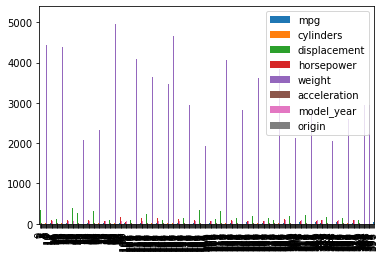

In [174]:
df=pd.DataFrame(df_auto)
df.plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003E0AE8A948>,
      dtype=object)

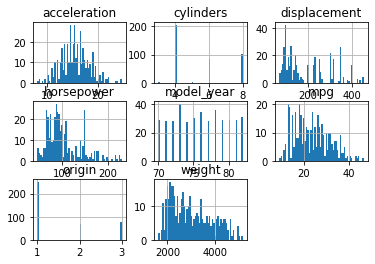

In [175]:
df_auto.hist(bins=60)

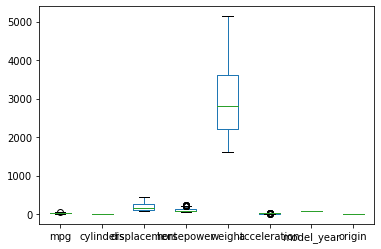

In [176]:
df_auto.plot.box()

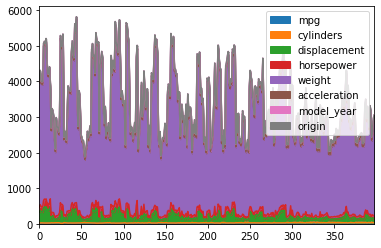

In [177]:
df_auto.plot.area()

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print()
    print()
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [180]:
#Linear regression and check r2 score for different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)


r2_score corresponding to random state:  42  is:  0.8474505164039001
r2_score corresponding to random state:  43  is:  0.8192024347414525
r2_score corresponding to random state:  44  is:  0.8255599025381297
r2_score corresponding to random state:  45  is:  0.8118634480493012
r2_score corresponding to random state:  46  is:  0.8436041864885547
r2_score corresponding to random state:  47  is:  0.8128485457173842
r2_score corresponding to random state:  48  is:  0.8074518529695625
r2_score corresponding to random state:  49  is:  0.854829099003559
r2_score corresponding to random state:  50  is:  0.8093601461940068
r2_score corresponding to random state:  51  is:  0.8046895599521322
r2_score corresponding to random state:  52  is:  0.7884202819174098
r2_score corresponding to random state:  53  is:  0.807733491225283
r2_score corresponding to random state:  54  is:  0.7393015134076084
r2_score corresponding to random state:  55  is:  0.8511731432841718
r2_score corresponding to random sta

In [181]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.5950772849156694
Standard Deviation in r2 score for Linear Regression:  0.20457024524560166


In [185]:
#Removing outliers with zscore
from scipy.stats import zscore
z_score=abs(zscore(df_auto))
print(df_auto.shape)
df_auto_final=df_auto.loc[(z_score<3).all(axis=1)]
print(df_auto_final.shape)

(398, 8)
(391, 8)


In [186]:
#separating input and target
X = df_auto.drop('mpg', axis=1)
Y = df_auto['mpg']

In [187]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [188]:
#calculating max r2 score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,Y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [189]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,Y)

r2 score corresponding to  42  is  0.8474505164039008
r2 score corresponding to  43  is  0.819202434741453
r2 score corresponding to  44  is  0.8255599025381299
r2 score corresponding to  45  is  0.8118634480493012
r2 score corresponding to  46  is  0.8436041864885548
r2 score corresponding to  47  is  0.812848545717384
r2 score corresponding to  48  is  0.8074518529695628
r2 score corresponding to  49  is  0.8548290990035589
r2 score corresponding to  50  is  0.8093601461940074
r2 score corresponding to  51  is  0.8046895599521335
r2 score corresponding to  52  is  0.7884202819174096
r2 score corresponding to  53  is  0.8077334912252826
r2 score corresponding to  54  is  0.7393015134076084
r2 score corresponding to  55  is  0.8511731432841726
r2 score corresponding to  56  is  0.8292429508438475
r2 score corresponding to  57  is  0.7718448711375236
r2 score corresponding to  58  is  0.8531053177608817
r2 score corresponding to  59  is  0.8010228758113509
r2 score corresponding to  60 

In [190]:
#Use GridSearchCV to find value of n_neighbors in KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,22)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,Y)
gknr.best_params_

{'n_neighbors': 8}

In [191]:
#Calculating r2 score for KNN model based on n_neighbors value
knr=KNeighborsRegressor(n_neighbors=8)
r_state=maxr2_score(knr,x,Y)

r2 score corresponding to  42  is  0.8839427728563506
r2 score corresponding to  43  is  0.8518398297759937
r2 score corresponding to  44  is  0.8631912651688469
r2 score corresponding to  45  is  0.8246123292520942
r2 score corresponding to  46  is  0.8873254512630204
r2 score corresponding to  47  is  0.8584086797143229
r2 score corresponding to  48  is  0.8520016610502513
r2 score corresponding to  49  is  0.8796703959070008
r2 score corresponding to  50  is  0.8206258959173808
r2 score corresponding to  51  is  0.8706658051305585
r2 score corresponding to  52  is  0.7629871981006252
r2 score corresponding to  53  is  0.8510216170659829
r2 score corresponding to  54  is  0.7516700539056237
r2 score corresponding to  55  is  0.8976816609502565
r2 score corresponding to  56  is  0.8879513260606411
r2 score corresponding to  57  is  0.8315822765544457
r2 score corresponding to  58  is  0.8976654312675021
r2 score corresponding to  59  is  0.8402131066599671
r2 score corresponding to  6

In [192]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,Y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,Y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNR Regression: ",cross_val_score(knr,x,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.5950772849156705
standard deviation in r2 score for Linear Regression:  0.20457024524560094

Mean r2 score for KNN Regression:  0.6900189653540167
standard deviation in r2 score for KNR Regression:  0.2499317362332148


In [193]:
#Check Lasso Regression to find best alpha value
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,Y)
clf.best_params_

{'alpha': 0.001}

In [194]:
#max r2 score for Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,Y)

r2 score corresponding to  42  is  0.8441326458012832
r2 score corresponding to  43  is  0.8240050735659612
r2 score corresponding to  44  is  0.8313179320005998
r2 score corresponding to  45  is  0.8119535525883224
r2 score corresponding to  46  is  0.8398015612303358
r2 score corresponding to  47  is  0.8143784931237732
r2 score corresponding to  48  is  0.7980468555941442
r2 score corresponding to  49  is  0.8462593723058905
r2 score corresponding to  50  is  0.8087160071917618
r2 score corresponding to  51  is  0.804673654820651
r2 score corresponding to  52  is  0.7776145047203384
r2 score corresponding to  53  is  0.8024883312425306
r2 score corresponding to  54  is  0.7323684647798583
r2 score corresponding to  55  is  0.8508769026459294
r2 score corresponding to  56  is  0.8273999839289242
r2 score corresponding to  57  is  0.7710637197392909
r2 score corresponding to  58  is  0.8491404066910101
r2 score corresponding to  59  is  0.7944133451030918
r2 score corresponding to  60

In [195]:
#cross val score for Lasso
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,Y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.5912852052836332
standard deviation in r2 score for Lasso Regression:  0.22911691864285172


In [196]:
#checking RMSE and r2 score for Linear regression
x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 91, test_size = 0.30)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [197]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  3.173596019904063
r2_score is:  0.8301575553028507


In [203]:
#checking RMSE and r2 score for Lasso
x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 91, test_size = 0.30)
lsreg=Lasso()
lsreg.fit(x_train,y_train)
y_pred=lsreg.predict(x_test)

In [204]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  3.4197368890942856
r2_score is:  0.8027902724236831


In [205]:
##checking RMSE and r2 score for KNeighbors Regressor
x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 72, test_size = 0.30)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [206]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2.4205088996600144
r2_score is:  0.891693398963216


In [ ]:
#saving Linear Regression as the final model
!pip install joblib
from sklearn.externals import joblib
joblib.dump(lreg, "Auto_lreg.pkl")